In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Data
df=pd.read_csv("C:\\Users\\prasa\\Downloads\\fraudTrain.csv") 

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,61
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,56
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [5]:
df.keys()

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=1048575, step=1)

In [7]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
age                        int64
dtype: object

In [8]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
age                      0
dtype: int64

In [9]:
df_obj=df.select_dtypes(include=['object'])

In [10]:
df_obj.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


### Exploratory Data Analysis

In [11]:
#DataSet Information

#Transaction amount statistics
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03,4.977099e+01
std,3.026977e+05,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02,1.736428e+01
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.800000e+01
25%,2.621435e+05,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00,3.600000e+01
50%,5.242870e+05,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00,4.800000e+01
75%,7.864305e+05,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00,6.100000e+01
max,1.048574e+06,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.900000e+01


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1048575.0,5.242870e+05,3.026977e+05,0.000000e+00,2.621435e+05,5.242870e+05,7.864305e+05,1.048574e+06
cc_num,1048575.0,4.171565e+17,1.308811e+18,6.041621e+10,1.800400e+14,3.520550e+15,4.642260e+15,4.992350e+18
amt,1048575.0,7.027910e+01,1.599518e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.305000e+01,2.894890e+04
zip,1048575.0,4.880159e+04,2.689804e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1048575.0,3.853336e+01,5.076852e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1048575.0,-9.022626e+01,1.375858e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1048575.0,8.905776e+04,3.024351e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1048575.0,1.344906e+09,1.019700e+07,1.325376e+09,1.336682e+09,1.344902e+09,1.354366e+09,1.362932e+09
merch_lat,1048575.0,3.853346e+01,5.111233e+00,1.902779e+01,3.472954e+01,3.936295e+01,4.195602e+01,6.751027e+01
merch_long,1048575.0,-9.022648e+01,1.377093e+01,-1.666712e+02,-9.689864e+01,-8.743923e+01,-8.023228e+01,-6.695090e+01


<AxesSubplot:xlabel='age', ylabel='is_fraud'>

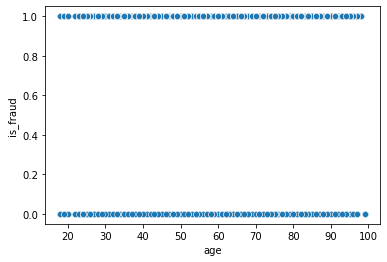

In [13]:
sns.scatterplot(data=df,x='age',y='is_fraud')

Text(0, 0.5, 'Age')

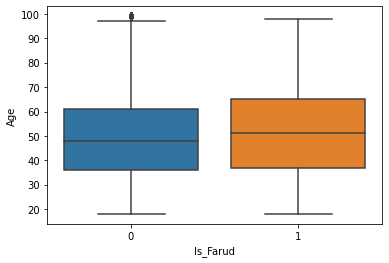

In [14]:
sns.boxplot(data=df,x='is_fraud',y='age')
plt.xlabel('Is_Farud')
plt.ylabel('Age')

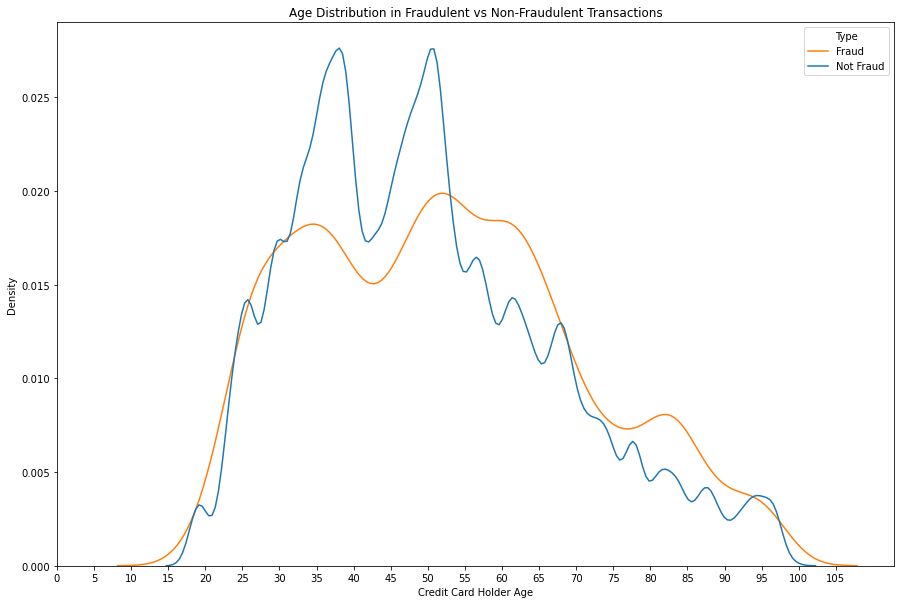

In [15]:
#Relation between age vs fraud
plt.figure(figsize=(15,10))
import datetime as dt

#here we dont have age column so we are gnerating its by using dob column

df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

<AxesSubplot:>

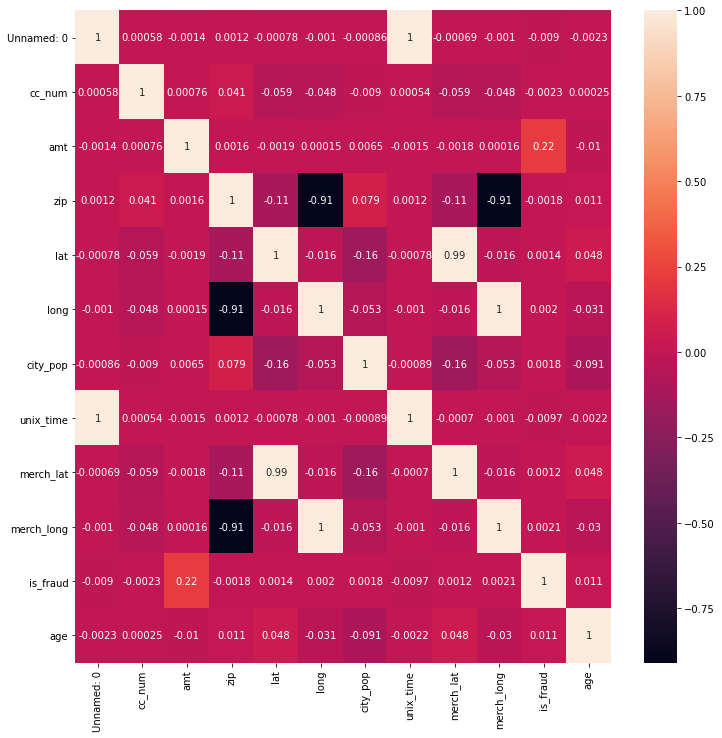

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

### Feature Encoding


In [17]:
# Remove unecessary columns

df1 = df.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob','trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1)

In [18]:
df1.head()

,category,amt,gender,is_fraud,age
0,misc_net,4.97,F,0,35
1,grocery_pos,107.23,F,0,45
2,entertainment,220.11,M,0,61
3,gas_transport,45.00,M,0,56
4,misc_pos,41.96,M,0,37


In [19]:
df1["category"].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [20]:
df1["gender"].unique()

array(['F', 'M'], dtype=object)

### label encoding

In [21]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'gender'.
df1['gender']= label_encoder.fit_transform(df1['gender'])
  
df1['gender'].unique()

array([0, 1])

In [22]:
# Import label encoder
  
# Encode labels in column 'category'.
df1['category']= label_encoder.fit_transform(df1['category'])
  
df1['category'].unique()

array([ 8,  4,  0,  2,  9,  3, 11, 12,  1, 10,  5, 13,  7,  6])

In [23]:
df1.head()

,category,amt,gender,is_fraud,age
0,8,4.97,0,0,35
1,4,107.23,0,0,45
2,0,220.11,1,0,61
3,2,45.00,1,0,56
4,9,41.96,1,0,37


In [24]:
df1.shape

(1048575, 5)

In [25]:
# Convert Euro amount into INR
# Set the exchange rate
exchange_rate = 88.33

# Convert Euro values to Rs values
df1['amt'] = df['amt'] * exchange_rate
df1

,category,amt,gender,is_fraud,age
0,8,439.0001,0,0,35
1,4,9471.6259,0,0,45
2,0,19442.3163,1,0,61
3,2,3974.8500,1,0,56
4,9,3706.3268,1,0,37
...,...,...,...,...,...
1048570,5,6801.4100,0,0,80
1048571,9,10329.3102,0,0,24
1048572,6,1878.7791,0,0,71
1048573,5,840.9016,0,0,33


In [26]:
x = df1[['category','amt','gender','age']]
y = df1['is_fraud']

# X = df1.drop('is_fraud', axis=1)
# y = df1['is_fraud']

In [27]:
x.head(2)

,category,amt,gender,age
0,8,439.0001,0,35
1,4,9471.6259,0,45


In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,)

In [29]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(734002, 4) (734002,)
(314573, 4) (314573,)


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [31]:
method= SMOTE()
x_resampled, y_resampled = method.fit_resample(x_train, y_train)

In [32]:
model=LogisticRegression()
model.fit(x_resampled,y_resampled)

LogisticRegression()

In [33]:
y_predict=model.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [35]:
confusion_matrix(y_test,y_predict)

array([[287929,  24783],
       [   427,   1434]], dtype=int64)

In [36]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    312712
           1       0.05      0.77      0.10      1861

    accuracy                           0.92    314573
   macro avg       0.53      0.85      0.53    314573
weighted avg       0.99      0.92      0.95    314573



In [37]:
accuracy_score(y_test,y_predict)

0.9198596192298767

In [38]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=5)

In [40]:
model2.fit(x_resampled,y_resampled)

RandomForestClassifier(random_state=5)

In [41]:
y_pred2=model2.predict(x_test)

In [42]:
confusion_matrix(y_test,y_pred2)

array([[309149,   3563],
       [   332,   1529]], dtype=int64)

In [43]:
accuracy_score(y_test,y_pred2)

0.9876181363308357

In [44]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    312712
           1       0.30      0.82      0.44      1861

    accuracy                           0.99    314573
   macro avg       0.65      0.91      0.72    314573
weighted avg       0.99      0.99      0.99    314573



In [45]:
print('Share of Non-Fraud in Test Data:',1-round(y_test.sum()/len(y_test),4))

Share of Non-Fraud in Test Data: 0.9941


In [ ]:
# from sklearn.svm import SVC
# model3=SVC(kernel='rbf',probability=True)
# model3.fit(X_train,y_train)
# predicted=model3.predict(X_test)
# predicted

# print('Classification report:\n', classification_report(y_test, predicted))
# conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
# print('Confusion matrix:\n', conf_mat)
# print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))                             

In [39]:
#'category','amt','gender','age'
l1 = [[2, 1017.562, 0, 63]]
pred=model.predict(l1)
print(pred)


[1]


C:\Users\Jayashri\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [40]:
l1 = [[8, 439, 0, 35]]
pred=model.predict(l1)
print(pred)

[0]


C:\Users\Jayashri\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
l1 = [[4, 24826.03, 1, 35]]
pred=model.predict(l1)
print(pred)

[1]


C:\Users\Jayashri\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
